In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
delivery = pd.read_csv("data/delivery.csv")

In [17]:
delivery.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


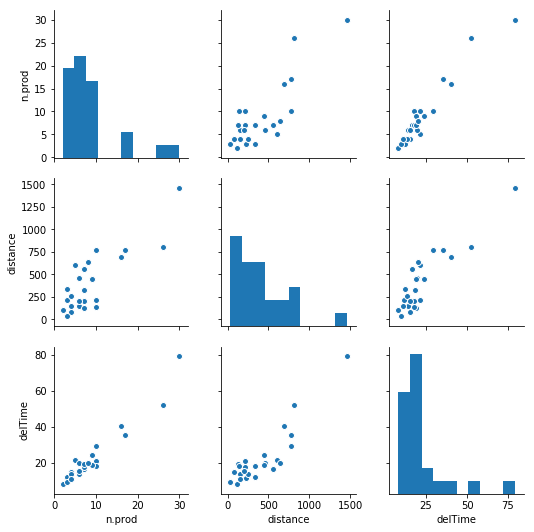

In [18]:
import seaborn as sns
sns.pairplot(delivery)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
X = delivery[["n.prod","distance"]]
y = delivery["delTime"]
model.fit(X,y)
print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)

Intercept: 2.3412311451922 
Coefficients: [1.61590721 0.01438483]


Text(0.5,0,'delTime')

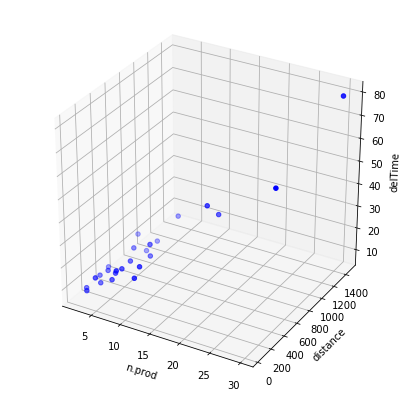

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d' )
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"],zs=delivery["delTime"],c='b')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

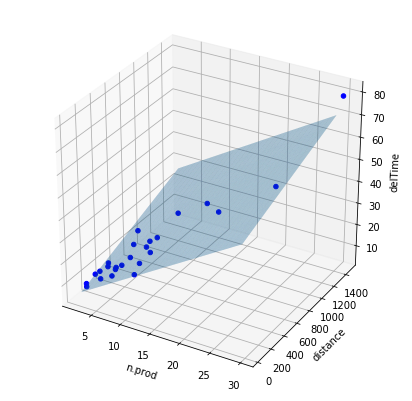

In [22]:
#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')

#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery["n.prod"], ys = delivery["distance"], zs=delivery["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery["n.prod"].min(), delivery["n.prod"].max(), 1) 
y_surf = np.arange(delivery["distance"].min(), delivery["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})

#Predicting the output of model for every point in the mesh
out = model.predict(X_mesh)

#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                alpha = 0.4)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Adding a constant column for the intercept. 
X1 = add_constant(X)
vif = pd.Series([variance_inflation_factor(X1.values,idx) 
           for idx in range(X1.shape[1])],
          index=X1.columns)
print(vif)

const       2.830380
n.prod      3.118474
distance    3.118474
dtype: float64


In [24]:
model.score(X,y)

0.9595937494832257

In [29]:
np.corrcoef(delivery["n.prod"],delivery["distance"])

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

#### Comparison between model r-squared based on number of predictors

In [32]:
# Model with a single predictor - n.prod
model1 = LinearRegression()
features = ["n.prod"]
target = ["delTime"]
model1.fit(delivery[features],delivery[target])
print(model1.score(delivery[features],delivery[target]))

0.9304813135986855


In [33]:
# Model with multiple predictors - n.prod,distance
model2 = LinearRegression()
features = ["n.prod","distance"]
target = ["delTime"]
model2.fit(delivery[features],delivery[target])
print(model2.score(delivery[features],delivery[target]))

0.9595937494832257


#### Computation of adjusted R-Squared

In [34]:
X = delivery[features]
y = delivery[target]
adjusted_rscore = 1 - (1-model2.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print(adjusted_rscore)

0.9559204539817008
